<a href="https://colab.research.google.com/github/sayaniketsaini24/Data-Analysis-Internship/blob/main/Cognifyz_Technologies_Data_Analysis_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Level- 01

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
url = "/content/drive/MyDrive/Cognifyz Technologies- Data Analysis Intern/Dataset .csv"
df = pd.read_csv(url)


## Task 1: Top Cuisines

* Determine the top three most common cuisines in the dataset.

In [37]:
print(df.shape)
print(df.columns)

(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [38]:
print(df['Cuisines'])

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object


In [39]:
cuisine_counts = df['Cuisines'].str.split(', ').explode().value_counts()
print(cuisine_counts)
top_cuisines = cuisine_counts.head(3)
print("The Top 3 Cuisines are: ", top_cuisines)

Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B�_rek               1
Name: count, Length: 145, dtype: int64
The Top 3 Cuisines are:  Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


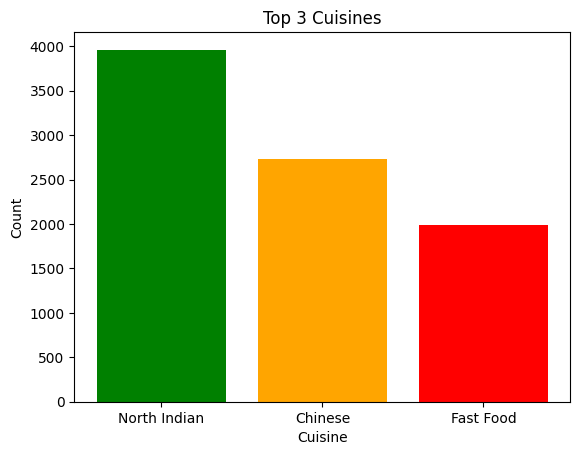

In [40]:
colours = ['green', 'orange', 'red']
plt.bar(top_cuisines.index, top_cuisines.values, color=colours)
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Top 3 Cuisines')
plt.show()

* Calculate the percentage of restaurants that serve each of the top cuisines.

In [41]:
total_restaurant = len(df)
print(total_restaurant)
top_cuisine10 = cuisine_counts.head()
percentages = (top_cuisine10 / total_restaurant) * 100
print("The Market share of Top 5 Cusines are: ", percentages)

9551
The Market share of Top 5 Cusines are:  Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Mughlai         10.417757
Italian          7.999162
Name: count, dtype: float64


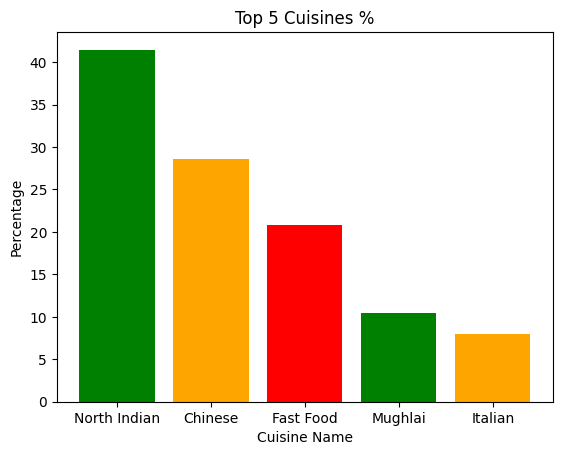

<Figure size 1200x600 with 0 Axes>

In [42]:
plt.bar(top_cuisine10.index, percentages.values, color= colours)
plt.xlabel('Cuisine Name')
plt.ylabel('Percentage')
plt.title('Top 5 Cuisines %')
plt.figure(figsize=(12, 6))
plt.show()

## Task 2: City Analysis

* Identify the city with the highest number of restaurants in the dataset.

In [43]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [44]:
city_count = df['City'].value_counts()
restaurant_no = city_count.head(1)
print("The City with Highest Number of Restaurants is: ", city_count.idxmax())
print(restaurant_no)

The City with Highest Number of Restaurants is:  New Delhi
City
New Delhi    5473
Name: count, dtype: int64


* Calculate the average rating for restaurants in each city.

In [45]:
rating_by_each_city = df.groupby('City')['Aggregate rating'].mean()
print("The Average Rating of each city is: ", rating_by_each_city)

The Average Rating of each city is:  City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


* Determine the city with the highest average rating.

In [46]:
top_rated_city = rating_by_each_city.idxmax()
value = rating_by_each_city.max()
print("The City with Highest Average Rating is: ", top_rated_city, ",", "Rating =", value)

The City with Highest Average Rating is:  Inner City , Rating = 4.9


## Task 3: Price Range Distribution

* Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

In [47]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


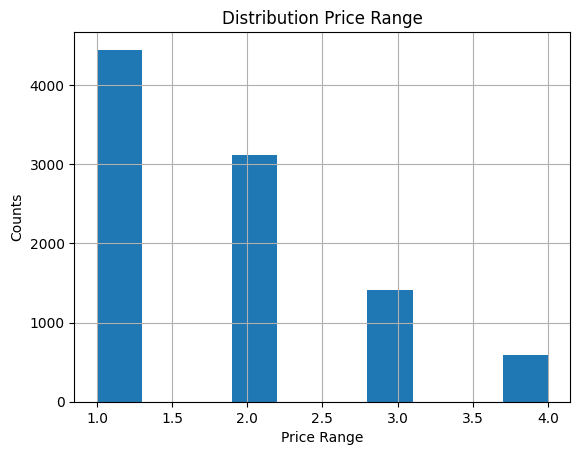

In [48]:
df.hist(column = "Price range")
plt.title("Distribution Price Range")
plt.xlabel("Price Range")
plt.ylabel("Counts")
plt.show()

* Calculate the percentage of restaurants in each price range category.

In [49]:
price_range_counts = df['Price range'].value_counts()
total_restaurants = len(df)
percentages = round((price_range_counts / total_restaurants) * 100,2)
percentage_m = pd.merge(price_range_counts, percentages, on = 'Price range')
print("The % of Restaurent in Each Price Range Category are: ", percentage_m)

The % of Restaurent in Each Price Range Category are:               count_x  count_y
Price range                  
1               4444    46.53
2               3113    32.59
3               1408    14.74
4                586     6.14


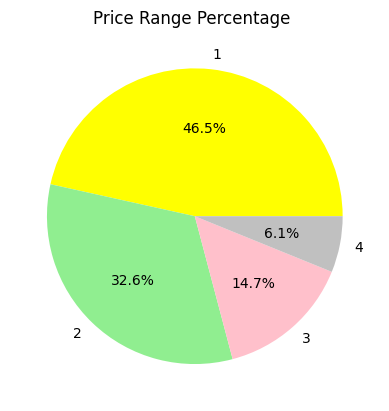

In [50]:
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors = ['Yellow', 'Lightgreen', 'Pink', 'Silver'])
plt.title('Price Range Percentage ')
plt.show()

## Task 4: Online Delivery

* Determine the percentage of restaurants that offer online delivery.

In [51]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [52]:
online_delivery = df['Has Online delivery'].value_counts().get('Yes', 0)
print("Total Restaurant with Online Delivery:", online_delivery)

Total Restaurant with Online Delivery: 2451


In [53]:
no_online_delivery = df['Has Online delivery'].value_counts().get('No', 0)
print("Total Restaurant with Online Delivery:", no_online_delivery)

Total Restaurant with Online Delivery: 7100


In [54]:
Row_count = len(df)
percentage_of_online_delivery = round((online_delivery / Row_count) * 100, 2)
print("Total % of Online Delivery: ", percentage_of_online_delivery)

Total % of Online Delivery:  25.66


In [55]:
percentage_of_no_online_delivery = round((no_online_delivery / Row_count) * 100, 2)
print("Total % of Online Delivery: ", percentage_of_no_online_delivery)

Total % of Online Delivery:  74.34


* Compare the average ratings of restaurants with and without online delivery.

In [56]:
Avg_rating_yes = round(df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean(), 2)
print("Average Rating with Online Delivery: ", Avg_rating_yes)

Average Rating with Online Delivery:  3.25


In [57]:
Avg_rating_no = round(df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean(), 2)
print("Average Rating without Online Delivery: ", Avg_rating_no)

Average Rating without Online Delivery:  2.47


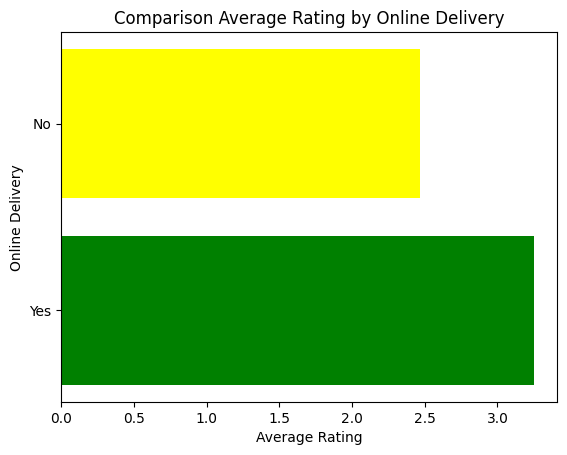

In [58]:
labels = ['Yes', 'No']
average_ratings = [Avg_rating_yes, Avg_rating_no]
colors = 'green', 'yellow'
plt.barh(labels, average_ratings, color=colors)
plt.ylabel('Online Delivery')
plt.xlabel('Average Rating')
plt.title('Comparison Average Rating by Online Delivery')
plt.show()

# Level 02

## Task 1: Restaurant Ratings

* Analyze the distribution of aggregate ratings and determine the most common rating range.

In [60]:
agg_rating_distribution = df['Aggregate rating'].value_counts()
print(agg_rating_distribution)

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [61]:
a = agg_rating_distribution.idxmax()
print("The Most Common Rating Range is: ", a)

The Most Common Rating Range is:  0.0


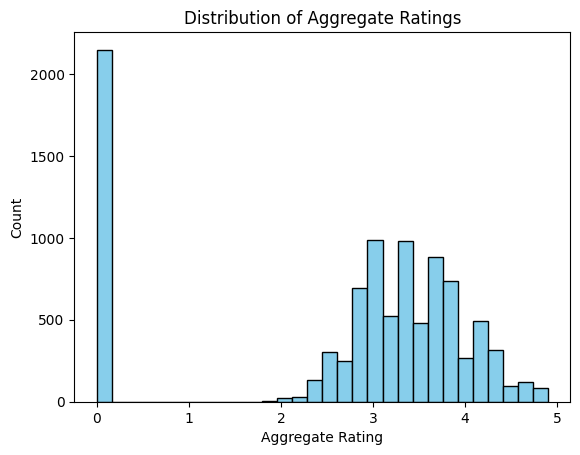

In [62]:
plt.hist(df['Aggregate rating'], bins=30, color= 'Skyblue', edgecolor='black')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.title('Distribution of Aggregate Ratings')
plt.show()

* Calculate the average number of votes received by restaurants.

In [63]:
avg_vote = round(df['Votes'].mean(), 3)
print("The Average Number of Votes Received by Restaurants: ", avg_vote)

The Average Number of Votes Received by Restaurants:  156.91


## Task 2: Cuisine Combination

* Identify the most common combinations of cuisines in the dataset.

In [65]:
common_combinations = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
top10 = common_combinations.head(10)
print("Top 10 most common combinations are: ", top10)

Top 10 most common combinations are:  Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


* Determine if certain cuisine combinations tend to have higher ratings.

In [66]:
max_rating = common_combinations.iloc[0]
print("The Max Rating is: ", max_rating)

The Max Rating is:  4.9


In [67]:
max_rated_rest = df.loc[df['Aggregate rating'] == max_rating]
print("The Restaurant having Maximum Rating is: ", max_rated_rest['Restaurant Name'])

The Restaurant having Maximum Rating is:  3                                           Ooma
8       Spiral - Sofitel Philippine Plaza Manila
10                              Silantro Fil-Mex
39                                    Coco Bambu
48                            Braseiro da G��vea
                          ...                   
9484              Restaurant Mosaic @ The Orient
9514                            Ministry of Crab
9524                                Gaga Manjero
9538                                   Starbucks
9540                            Draft Gastro Pub
Name: Restaurant Name, Length: 61, dtype: object


## Task 3: Geographic Analysis

* Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [82]:
!pip install geodatasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from geodatasets import get_path
import folium
from folium.plugins import HeatMap

In [83]:
url = "/content/drive/MyDrive/Cognifyz Technologies- Data Analysis Intern/Dataset .csv"
df = pd.read_csv(url)

In [84]:
print(df[["Longitude", "Latitude"]])

       Longitude   Latitude
0     121.027535  14.565443
1     121.014101  14.553708
2     121.056831  14.581404
3     121.056475  14.585318
4     121.057508  14.584450
...          ...        ...
9546   28.977392  41.022793
9547   29.041297  41.009847
9548   29.034640  41.055817
9549   29.036019  41.057979
9550   29.026016  40.984776

[9551 rows x 2 columns]


In [86]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")
print(gdf.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

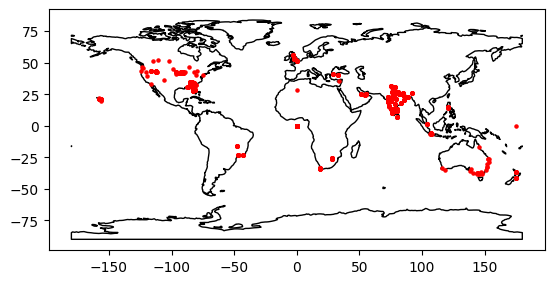

In [88]:
world = geopandas.read_file(get_path('naturalearth_land'))
ax = world.plot(color = 'White', edgecolor='Black')
gdf.plot(ax=ax, marker = 'o', color='red', markersize = 5)
plt.show()

* Identify any patterns or clusters of restaurants in specific areas.

In [89]:
world_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=1, height = '100%', width = '100%')
heat_marker = [[row['Latitude'], row['Longitude']] for i, row in df.iterrows()]
HeatMap(heat_marker).add_to(world_map)
world_map

## Task 4: Restaurant Chains

* Identify if there are any restaurant chains present in the dataset.

In [91]:
restaurant_chain = df.groupby('Restaurant Name')['Votes'].size().reset_index(name='OutletCount')
new = restaurant_chain[restaurant_chain['OutletCount'] > 1]
restaurant_chains = new.sort_values(by='OutletCount', ascending=False)
print(restaurant_chains[['Restaurant Name', 'OutletCount']].head(10))

       Restaurant Name  OutletCount
1098   Cafe Coffee Day           83
2098    Domino's Pizza           79
6106            Subway           63
2716  Green Chick Chop           51
4077        McDonald's           48
3478         Keventers           34
4961         Pizza Hut           30
2619             Giani           29
680     Baskin Robbins           28
663    Barbeque Nation           26


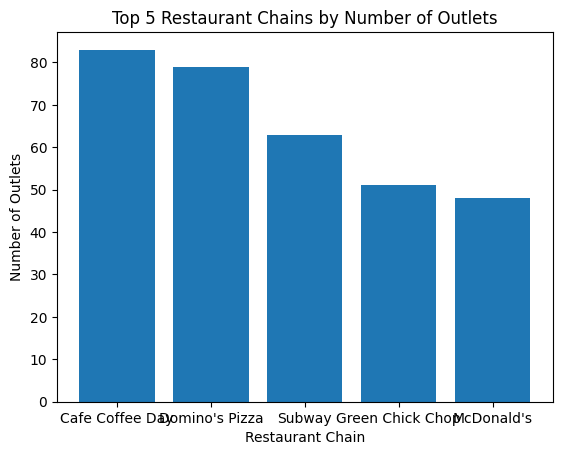

In [92]:
plt.bar(restaurant_chains['Restaurant Name'][:5], restaurant_chains['OutletCount'][:5])
plt.xlabel('Restaurant Chain')
plt.ylabel('Number of Outlets')
plt.title('Top 5 Restaurant Chains by Number of Outlets')
plt.show()

* Analyze the ratings and popularity of different restaurant chains.

In [97]:
ratings = df.groupby('Restaurant Name')['Aggregate rating'].mean().reset_index(name = 'Average Rating').sort_values(by='Average Rating', ascending=False)
print(ratings)

                      Restaurant Name  Average Rating
5322   Restaurant Mosaic @ The Orient             4.9
4177                 Ministry of Crab             4.9
4135                            Miann             4.9
5757          Shorts Burger and Shine             4.9
4165                            Milse             4.9
...                               ...             ...
1105                      Cafe Corner             0.0
4905                  Pheva Tandooris             0.0
4913                     Pick & Carry             0.0
1096                     Cafe Brownie             0.0
2292  Famous Parantha and Poori Sabzi             0.0

[7446 rows x 2 columns]


In [98]:
votes = df.groupby('Restaurant Name')['Votes'].sum().reset_index(name = 'Total Votes').sort_values(by='Total Votes', ascending=False)
print(votes)

                Restaurant Name  Total Votes
663             Barbeque Nation        28142
101   AB's - Absolute Barbecues        13400
6943                       Toit        10934
785                   Big Chill        10853
2297                 Farzi Cafe        10098
...                         ...          ...
4375                  Muncheezz            0
6217            Swiss Gourmessa            0
2110      Dosa and Pizza Corner            0
6215            Sweets n Treats            0
2433               Food Station            0

[7446 rows x 2 columns]


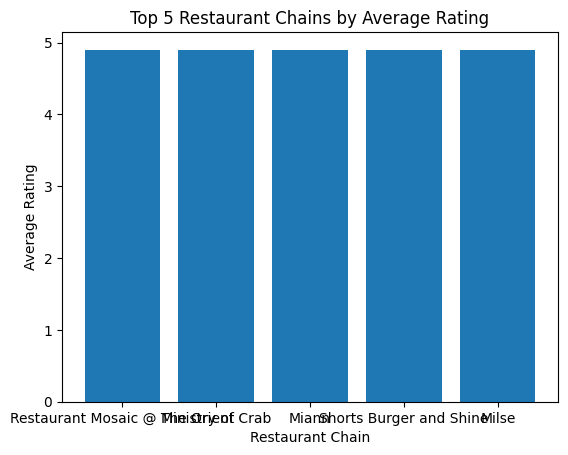

In [99]:
plt.bar(ratings['Restaurant Name'][:5], ratings['Average Rating'][:5])
plt.xlabel('Restaurant Chain')
plt.ylabel('Average Rating')
plt.title('Top 5 Restaurant Chains by Average Rating')
plt.show()

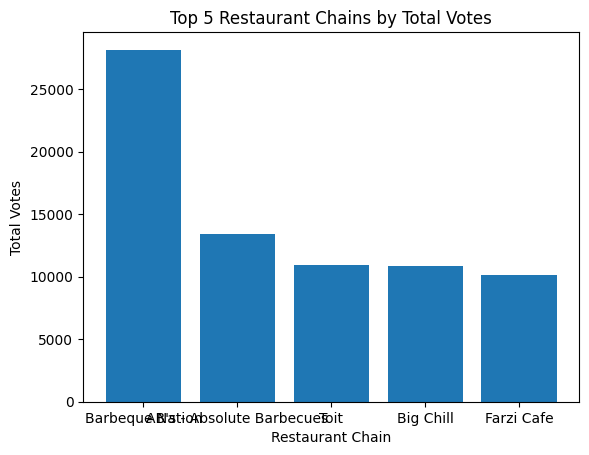

In [100]:
plt.bar(votes['Restaurant Name'][:5], votes['Total Votes'][:5])
plt.xlabel('Restaurant Chain')
plt.ylabel('Total Votes')
plt.title('Top 5 Restaurant Chains by Total Votes')
plt.show()